<a href="https://colab.research.google.com/github/baeldin/strass_preview_generator/blob/main/strass_band_generator_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import urllib.request
import numpy as np
import copy
from PIL import Image
import time
import os

In [2]:
# bild laden
urlstring = "https://raw.githubusercontent.com/baeldin/strass_preview_generator/main/strass_single_even_transparent.png"

req = urllib.request.urlopen(urlstring)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img_stone = cv2.imdecode(arr, -1)# 'Load it as it is'
# show stone, just for testing purposes
urlstring = "https://raw.githubusercontent.com/baeldin/strass_preview_generator/main/funkeln.png"
urllib.request.urlretrieve(urlstring, "funkeln.png")
time.sleep(1)
img = Image.open("./funkeln.png")
img_shine = np.array(img) #.convert('RGBA'))
print(img_shine[50, 50, :])

[255 255 255 250]


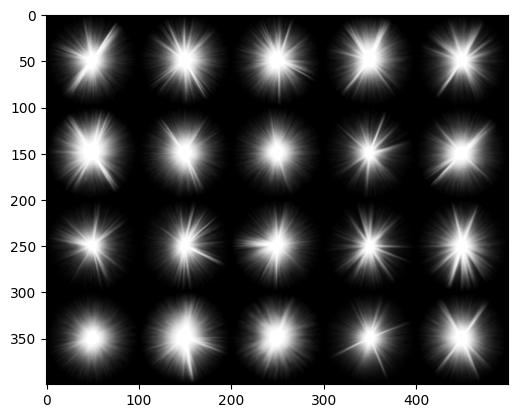

In [3]:
img_shine_ = copy.copy(img_shine)
img_shine_float = 1./ 255. * img_shine_.astype(float)
img_shine_float = img_shine_float ** 1.2
plt.imshow(img_shine_float[:,:,3], cmap='gray')

img_shine = (255 * img_shine_float).astype(np.uint8)

In [42]:
shine = []
for ii in range(4):
  for jj in range(5):
    shine.append(img_shine[100*ii:100*(ii+1), 100*jj:100*(jj+1), :])

shine_all = {}
for size in [30, 15, 7]:
  shine_all[size] = []
  for idx, sh in enumerate(shine):
    shine_resized = cv2.resize(sh.astype(float), (size, size), interpolation = cv2.INTER_AREA).astype(np.uint8)
    shine_all[size].append(Image.fromarray(shine_resized.astype(np.uint8)))

test = np.zeros((1000, 1000, 4))
test[:, :, 3] = 255

test = Image.fromarray(test.astype(np.uint8))

sizes = [30, 15, 7]
for ii in range(250):
  x = np.random.randint(0, 900)
  y = np.random.randint(0, 900)
  s = np.random.randint(0, 15)
  i = np.random.randint(0, 3)
  siz = sizes[i]
  test.paste(shine_all[siz][s], (x, y), shine_all[siz][s])

test.save("test.png")

In [5]:
def load_stones():
  stones = {}
  for idx, ii in enumerate([2, 7, 45, 66]):
    for jj in range(1, 14):
      img_name = "{:03d}_{:02d}.png".format(ii, jj)
      url_str = "https://raw.githubusercontent.com/baeldin/strass_preview_generator/main/stones/{:s}".format(img_name)
      try:
        urllib.request.urlretrieve(url_str, img_name)
        img = Image.open(img_name)
        img_rgb = np.array(img.convert('RGBA'))
        print(img_rgb.shape)
        stones[img_name] = img_rgb
        print("Got img "+img_name)
      except:
        pass
  return stones

stones = load_stones()


# import urllib.request
# from PIL import Image
# urllib.request.urlretrieve("https://raw.githubusercontent.com/baeldin/strass_preview_generator/main/stones/007_11.png"
# , "007_11.png")
# img = Image.open("007_11.png")
# img_rgb = np.array(img.convert('RGBA'))
# plt.imshow(img_rgb)
# print(np.array(img_rgb).shape)
# print()
# url_str = "https://raw.githubusercontent.com/baeldin/strass_preview_generator/main/stones/007_11.png"
# req = urllib.request.urlopen(url_str)
# arr = np.asarray(bytearray(req.read()))
# print(arr.shape)



(55, 55, 4)
Got img 002_01.png
(55, 55, 4)
Got img 002_02.png
(55, 55, 4)
Got img 002_03.png
(55, 55, 4)
Got img 002_04.png
(55, 55, 4)
Got img 002_05.png
(55, 55, 4)
Got img 002_06.png
(55, 55, 4)
Got img 002_07.png
(55, 55, 4)
Got img 002_09.png
(55, 55, 4)
Got img 002_10.png
(55, 55, 4)
Got img 002_11.png
(55, 55, 4)
Got img 002_13.png
(55, 55, 4)
Got img 007_03.png
(55, 55, 4)
Got img 007_04.png
(55, 55, 4)
Got img 007_05.png
(55, 55, 4)
Got img 007_11.png
(55, 55, 4)
Got img 045_01.png
(55, 55, 4)
Got img 045_03.png
(55, 55, 4)
Got img 045_04.png
(55, 55, 4)
Got img 045_10.png
(55, 55, 4)
Got img 066_03.png
(55, 55, 4)
Got img 066_07.png
(55, 55, 4)
Got img 066_09.png
(55, 55, 4)
Got img 066_13.png


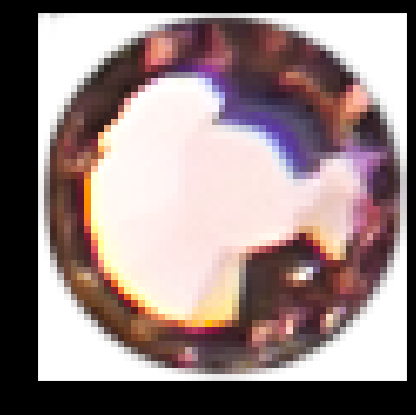

In [6]:

big_arr = np.zeros((55*4, 55*13, 4))
for idx, ii in enumerate([2, 7, 45, 66]):
  for jj in range(1, 14):
    img_name = "{:03d}_{:02d}.png".format(ii, jj)
    if img_name in stones.keys():
      big_arr[55*idx:55*(idx+1), 55*(jj-1):55*jj, :] = stones[img_name]

cv2.imwrite("test.png", big_arr)
plt.gcf().set_facecolor("k")
plt.imshow(big_arr.astype(np.uint8))
plt.imshow(stones["002_02.png"])

23 34
[241.13, 179.74]
[240.26, 182.2]
[245.25, 189.36]
[245.26, 186.62]
[245.26, 184.01]
[239.1, 159.01]
[241.53, 157.69]
[244.13, 158.11]
[245.73, 160.17]
[244.73, 162.6]
[242.15, 163.11]


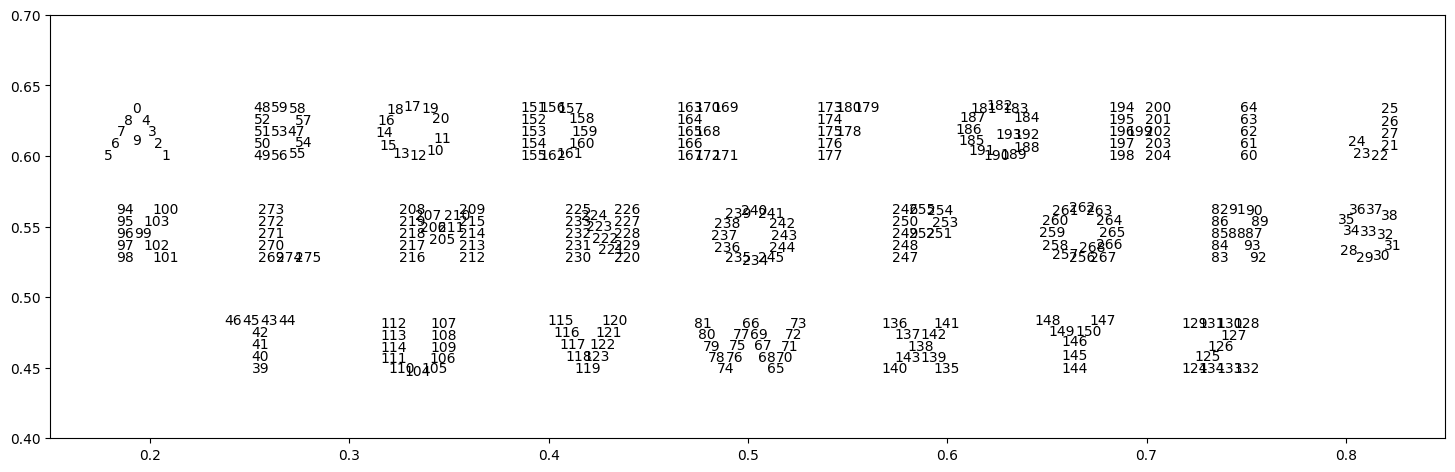

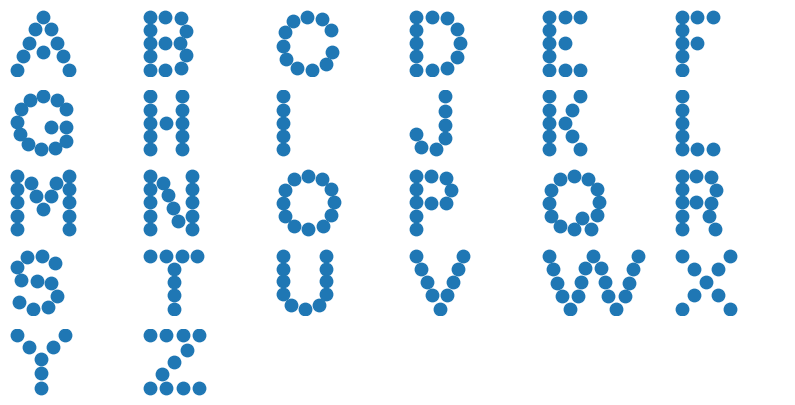

In [7]:
import pandas as pd
req = urllib.request.urlopen("https://raw.githubusercontent.com/baeldin/strass_preview_generator/main/Alphabet.asc")
df = pd.read_csv("https://raw.githubusercontent.com/baeldin/strass_preview_generator/main/Alphabet.asc", delimiter=";", header=None, skiprows=3)
fig, ax = plt.subplots(1,1, figsize=(18,5.5))
#ax.scatter(df[2], df[3], c=df.index, cmap='nipy_spectral')


for idx, row in df.iterrows():
  ax.text(row[2]/300., row[3]/300., str(idx))
ax.set_xlim([0.15, 0.85])
ax.set_ylim([0.4, 0.7])

number_of_points = np.array([10, 13, 11, 12, 10, 8, 13, 11, 5, 7, 10, 7,
                             15, 14, 12, 10, 13, 12, 11, 9, 11, 9, 17,
                             9, 7, 11], dtype = int)

ii = 2

idx_start = number_of_points[0:ii].sum()
idx_end = number_of_points[0:ii+1].sum()

print(idx_start, idx_end)
xa = df[2][idx_start:idx_end].values
ya = df[3][idx_start:idx_end].values

height = ya.max() - ya.min()
scale = 4 / height

leter_indices = {
    'A': [0, 9],
    'B': [47, 59],
    'C': [10, 20],
    'D': [151, 162],
    'E': [163, 172],
    'F': [173, 180],
    'G': [181, 193],
    'H': [194, 204],
    'I': [60, 64],
    'J': [21, 27],
    'K': [94, 103],
    'L': [269, 275],
    'M': [205, 219],
    'N': [220, 233],
    'O': [234, 245],
    'P': [246, 255],
    'Q': [256, 268],
    'R': [82, 93],
    'S': [28, 38],
    'T': [39, 46],
    'U': [104, 114],
    'V': [115, 123],
    'W': [65, 81],
    'X': [135, 143],
    'Y': [144, 150],
    'Z': [124, 134]}

for x, y in zip(xa, ya):
  print([x, y])

fig, ax = plt.subplots(5, 6, figsize=(10,5))
ii = 0
for key, item in leter_indices.items():
  dots_x = df[2][leter_indices[key][0]:leter_indices[key][1]+1]
  dots_y = df[3][leter_indices[key][0]:leter_indices[key][1]+1]
  scale = 4. / (dots_y.max() - dots_y.min())
  dots_x = (dots_x - dots_x.min()) * scale
  dots_y = (dots_y - dots_y.min()) * scale
  ax.flatten()[ii].scatter(dots_x, dots_y, s=80.)
  ax.flatten()[ii].set_xlim([-0.5, 7.])
  ax.flatten()[ii].set_ylim([-0.5, 4.5])
  ax.flatten()[ii].axis('off')
  ii = ii + 1

#for url_string in urllist:
#    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)

letters_new = {}
for key, item in leter_indices.items():
  letter_list = []
  for ii in range(item[0], item[1]+1):
    letter_list.append([df[3][ii], df[2][ii]])
  tmp_arr = np.array(letter_list)
  scale = 4. / (tmp_arr[:,0].max() - tmp_arr[:,0].min())
  tmp_arr[:,0] = (tmp_arr[:,0] - tmp_arr[:,0].min()) * scale
  tmp_arr[:,1] = (tmp_arr[:,1] - tmp_arr[:,1].min()) * scale
  letters_new[key] = tmp_arr

for ii in range(26, 30):
  ax.flatten()[ii].axis('off')
plt.show()

Offsettting A by 112 pixels, will insert 2 solid columns before letter
Offsettting B by 157 pixels, will insert 3 solid columns before letter
Offsettting C by 118 pixels, will insert 2 solid columns before letter
Offsettting D by 134 pixels, will insert 3 solid columns before letter
Offsettting E by 170 pixels, will insert 3 solid columns before letter
Offsettting F by 170 pixels, will insert 3 solid columns before letter
Offsettting G by 119 pixels, will insert 2 solid columns before letter
Offsettting H by 170 pixels, will insert 3 solid columns before letter
Offsettting I by 265 pixels, will insert 6 solid columns before letter
Offsettting J by 177 pixels, will insert 4 solid columns before letter
Offsettting K by 170 pixels, will insert 3 solid columns before letter
Offsettting L by 171 pixels, will insert 3 solid columns before letter
Offsettting M by 110 pixels, will insert 2 solid columns before letter
Offsettting N by 139 pixels, will insert 3 solid columns before letter
Offset

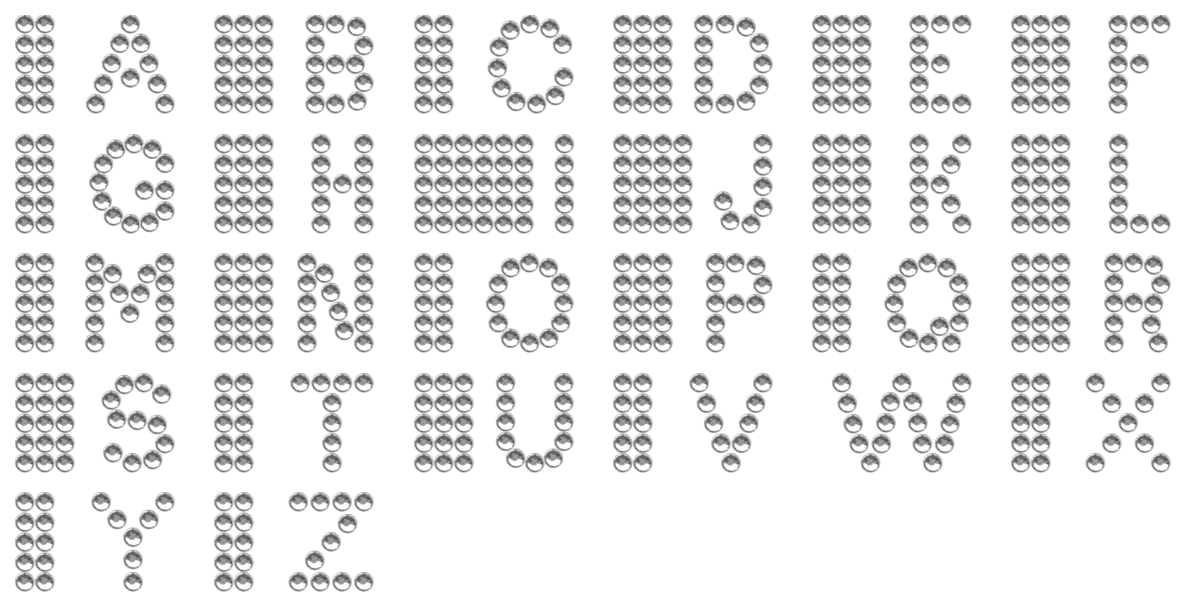

In [75]:
alphabet_left = []
coords_left = []

flipped_stone = np.flip(img_stone, axis=0)
# flipped_stone = stones["007_04.png"]
stone_size = 44

def add_shine(img, coordinates=None):
  for ii in range(50):
    nx = np.random.randint(0, 20)
    ny = np.random.randint(0, 4)
    x = np.random.randint(-7, 7)
    y = np.random.randint(-7, 7)
    s = np.random.randint(0, 15)
    i = np.random.randint(0, 2)
    siz = sizes[i]
    img[x:x+siz, y:y+siz, :] += shine_all[siz][s]
    img = np.where(test > 255, 255, test)

    return img

char_max = "void"
dimx_max = 0
for draw in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
             'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']:
# loop over stone coordinates in letter and add stones to image
  dimy = 5 * stone_size
  dimx = 1 + int(np.ceil(stone_size * (1 + letters_new[draw][:,1].max()) - np.floor(letters_new[draw][:,1].min())))
  dimx_max = dimx if dimx > dimx_max else dimx_max
  char_max = draw if dimx > dimx_max else char_max

for draw in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
             'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']:
# loop over stone coordinates in letter and add stones to image
  dimy = 5 * stone_size
  dimx = 1 + int(np.ceil(stone_size * (1 + letters_new[draw][:,1].max()) - np.floor(letters_new[draw][:,1].min())))
  dimx_offset = dimx_max - dimx
  padding_columns = int(np.floor(dimx_offset/float(stone_size)))
  print("Offsettting " + draw + " by {:d} pixels, will insert {:d} solid columns before letter".format(dimx_offset, padding_columns))
  new_img = np.zeros((dimy, dimx_max + stone_size, 4), dtype=int)
  coords = []
  for dot in range(letters_new[draw].shape[0]):
    doty, dotx = letters_new[draw][dot, :]
    coords.append((int(stone_size * doty), int(stone_size * dotx) + stone_size + dimx_offset))
    for xx in range(stone_size):
      for yy in range(stone_size):
        new_img[int(stone_size * doty + yy), int(stone_size * dotx + xx) + stone_size + dimx_offset, :] += flipped_stone[yy, xx]
  for ii in range(padding_columns):
    for dot in range(letters_new['I'].shape[0]):
      doty, dotx = letters_new['I'][dot, :]
      coords.append((int(stone_size * doty), int(stone_size * dotx + stone_size * ii)))
      for xx in range(stone_size):
        for yy in range(stone_size):
          new_img[int(stone_size * doty + yy), int(stone_size * dotx + xx + stone_size * ii), :] += flipped_stone[yy, xx]
  new_img = np.flip(new_img, axis=0)
  alphabet_left.append(new_img)
  coords_left.append(coords)


fig, ax = plt.subplots(5, 6, figsize=(10,5), dpi=150)
for ii, letter in enumerate(alphabet_left):
  # letter = np.where(letter > 255., 255., letter)
  ax.flatten()[ii].imshow(letter)
  ax.flatten()[ii].axis('off')

for ii in range(26, 30):
  ax.flatten()[ii].axis('off')

plt.show()
plt.close('all')

Offsettting A by 112 pixels, will insert 2 solid columns after letter
Offsettting B by 157 pixels, will insert 3 solid columns after letter
Offsettting C by 118 pixels, will insert 2 solid columns after letter
Offsettting D by 134 pixels, will insert 3 solid columns after letter
Offsettting E by 170 pixels, will insert 3 solid columns after letter
Offsettting F by 170 pixels, will insert 3 solid columns after letter
Offsettting G by 119 pixels, will insert 2 solid columns after letter
Offsettting H by 170 pixels, will insert 3 solid columns after letter
Offsettting I by 265 pixels, will insert 6 solid columns after letter
Offsettting J by 177 pixels, will insert 4 solid columns after letter
Offsettting K by 170 pixels, will insert 3 solid columns after letter
Offsettting L by 171 pixels, will insert 3 solid columns after letter
Offsettting M by 110 pixels, will insert 2 solid columns after letter
Offsettting N by 139 pixels, will insert 3 solid columns after letter
Offsettting O by 114

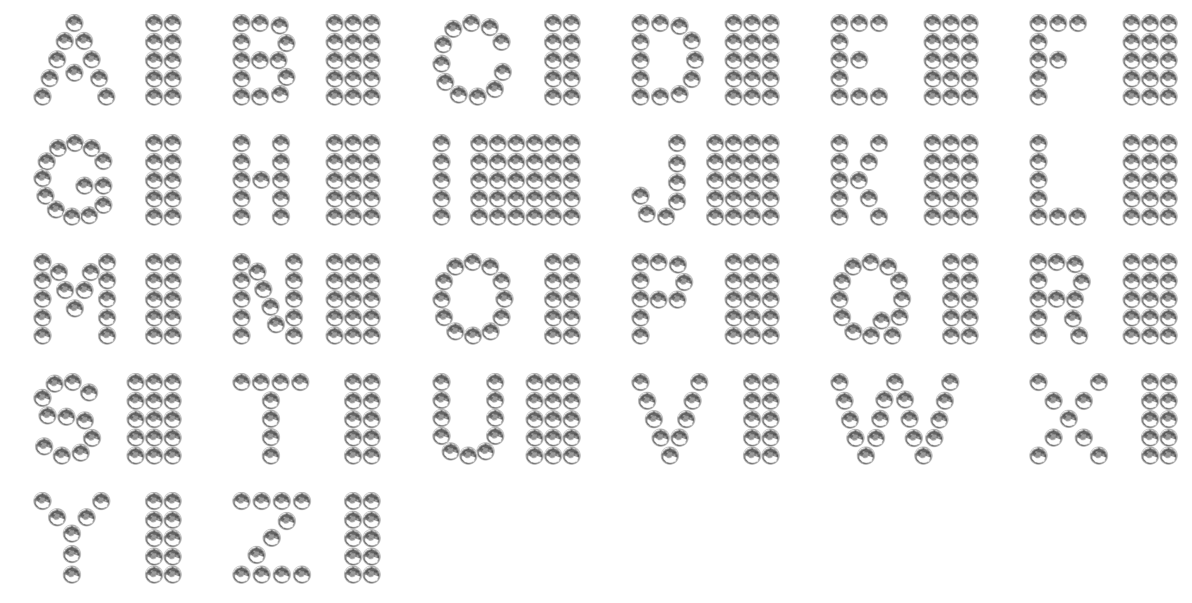

In [174]:
alphabet_right = []
coords_right = []

char_max = "void"
dimx_max = 0
for draw in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
             'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']:
# loop over stone coordinates in letter and add stones to image
  dimy = 5 * stone_size
  dimx = 1 + int(np.ceil(stone_size * (1 + letters_new[draw][:,1].max()) - np.floor(letters_new[draw][:,1].min())))
  dimx_max = dimx if dimx > dimx_max else dimx_max
  char_max = draw if dimx > dimx_max else char_max

for draw in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
             'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']:
# loop over stone coordinates in letter and add stones to image
  dimy = 5 * stone_size
  dimx = 1 + int(np.ceil(stone_size * (1 + letters_new[draw][:,1].max()) - np.floor(letters_new[draw][:,1].min())))
  dimx_offset = dimx_max - dimx
  padding_columns = int(np.floor(dimx_offset/stone_size))
  print("Offsettting " + draw + " by {:d} pixels, will insert {:d} solid columns after letter".format(dimx_offset, padding_columns))
  new_img = np.zeros((dimy, dimx_max + 88, 4), dtype=int)
  coords = []
  for dot in range(letters_new[draw].shape[0]):
    doty, dotx = letters_new[draw][dot, :]
    coords.append((int(stone_size * doty),  int(stone_size * dotx) + stone_size))
    for xx in range(stone_size):
      for yy in range(stone_size):
        new_img[int(stone_size * doty + yy), int(stone_size * dotx + xx) + stone_size, :] += flipped_stone[yy, xx]
  for ii in range(padding_columns):
    for dot in range(letters_new['I'].shape[0]):
      doty, dotx = letters_new['I'][dot, :]
      coords.append((int(stone_size * doty), int(dimx_max - stone_size * (ii) + dotx) + stone_size))
      for xx in range(stone_size):
        for yy in range(stone_size):
          new_img[int(stone_size * doty + yy), int(dimx_max - stone_size * (ii) + dotx + xx) + stone_size, :] += flipped_stone[yy, xx]
  new_img = np.flip(new_img, axis=0)
  new_img = np.where(new_img > 255, 255, new_img)
  alphabet_right.append(new_img)
  coords_right.append(coords)


fig, ax = plt.subplots(5, 6, figsize=(10,5), dpi=150)
for ii, letter in enumerate(alphabet_right):
  ax.flatten()[ii].imshow(letter)
  ax.flatten()[ii].axis('off')

print(alphabet_right[3])
for ii in range(26, 30):
  ax.flatten()[ii].axis('off')

plt.show()
plt.close('all')
#new_img = np.flip(new_img, axis=0)
#plt.imshow(new_img)
#cv2.imwrite(draw+".png", new_img)



<class 'numpy.ndarray'>


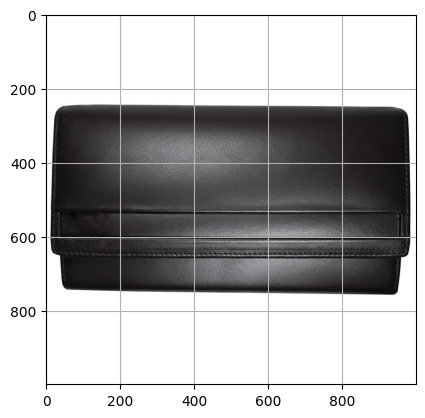

In [16]:
# get wallet img
req = urllib.request.urlopen("https://raw.githubusercontent.com/baeldin/strass_preview_generator/main/Damenboerse_ohneStrass_fixed.png")
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img_wallet = cv2.imdecode(arr, -1)
ax = plt.axes()
print(type(img_wallet))
ax.imshow(img_wallet)
ax.grid()

13.2
69.39393939393939
Band has dimensions 916 x 916
(1000, 1000, 4)


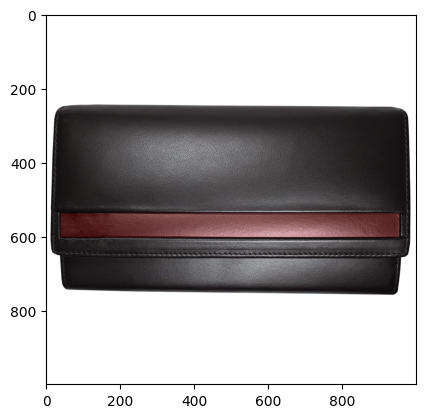

In [17]:
# VOID Coordinates
x_start = 40
x_end = 956
y_start = 538
y_end = 604

band_width = x_end - x_start
band_height = y_end - y_start

stone_size_scaled = band_height / 5.
print(stone_size_scaled)
print(band_width / stone_size_scaled)
print("Band has dimensions {:d} x {:d}".format(band_width, band_width))
wallet_marked = copy.copy(img_wallet)
wallet_marked[y_start:y_end, x_start:x_end] += np.array([50, 0, 0, 0]).astype(np.uint8)
plt.imshow(wallet_marked)
print(wallet_marked.shape)

In [168]:
def make_my_band(total_columns = 69, letter_indices = [0, 13]):
  letter_width = 2 * dimx_max + 3 * stone_size
  total_border = int(total_columns - letter_width / stone_size)

  left_space = int(np.floor(total_border/2))
  right_space = int(np.ceil(total_border/2))
  total_width = total_border + letter_width
  def make_border(N):
    coords = []
    print("Making border", N)
    print(dimy, stone_size)
    border_img = np.zeros((dimy, int(N) * stone_size, 4), dtype=int)
    print(border_img.shape)
    for ii in range(N):
      for dot in range(letters_new['I'].shape[0]):
        doty, dotx = letters_new['I'][dot, :]
        coords.append((int(stone_size * doty), int(stone_size * ii + dotx)))
        for xx in range(stone_size):
          for yy in range(stone_size):
            border_img[int(stone_size * doty + yy), int(stone_size * ii + dotx + xx), :] += img_stone[yy, xx, :]
    return border_img, coords

  left_border, coords_border_left = make_border(left_space)
  # plt.imshow(left_border)
  right_border, coords_border_right = make_border(right_space)
  # plt.imshow(right_border)


  img_full = cv2.hconcat([left_border, alphabet_left[letter_indices[0]], alphabet_right[letter_indices[1]], right_border])
  fig, ax = plt.subplots(1, 1, figsize=(24, 2))
  # ax.imshow(img_full)
  ax.axis('off')
  return img_full, left_border, right_border, coords_border_left, coords_border_right

Making border 25
220 44
(220, 1100, 4)
Making border 26
220 44
(220, 1144, 4)
[[(176, 232), (0, 308), (44, 291), (89, 273), (133, 255), (0, 156), (44, 173), (89, 191), (133, 209), (57, 232), (0, 0), (43, 0), (87, 0), (131, 0), (176, 0), (0, 44), (43, 44), (87, 44), (131, 44), (176, 44)], [(87, 289), (176, 201), (0, 201), (43, 201), (87, 201), (131, 201), (87, 245), (47, 308), (6, 293), (0, 245), (128, 308), (170, 292), (176, 245), (0, 0), (43, 0), (87, 0), (131, 0), (176, 0), (0, 44), (43, 44), (87, 44), (131, 44), (176, 44), (0, 88), (43, 88), (87, 88), (131, 88), (176, 88)], [(18, 289), (59, 308), (0, 248), (5, 203), (79, 162), (35, 171), (125, 166), (176, 233), (162, 190), (166, 277), (131, 305), (0, 0), (43, 0), (87, 0), (131, 0), (176, 0), (0, 44), (43, 44), (87, 44), (131, 44), (176, 44)], [(176, 178), (131, 178), (87, 178), (43, 178), (0, 178), (176, 225), (169, 271), (134, 300), (88, 308), (42, 300), (6, 271), (0, 225), (0, 0), (43, 0), (87, 0), (131, 0), (176, 0), (0, 44), (43

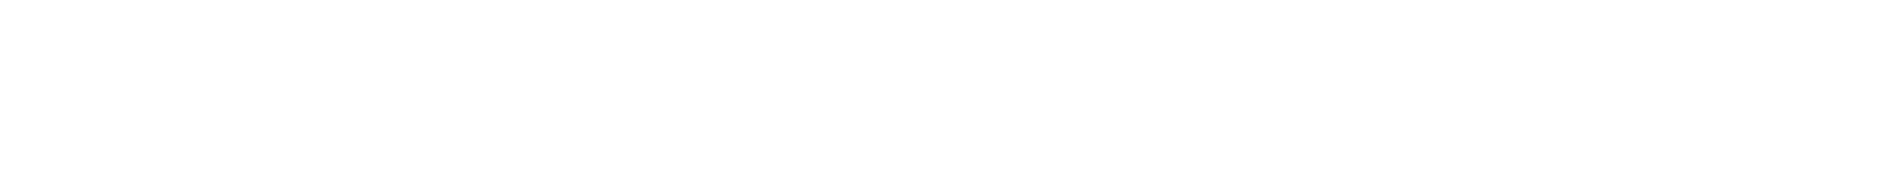

In [176]:
band_test, band_left, band_right, coords_border_left, coords_border_right = make_my_band()

print(coords_left, coords_right)
# plt.imshow(band_test)

def reshape_img_to_height(img, height):
  iy, ix, _ = img.shape
  scale_factor = float(height) / float(iy)
  small_dims = (int(ix * scale_factor), int(iy * scale_factor))
  img_smaller = cv2.resize(img.astype(float), small_dims, interpolation = cv2.INTER_AREA).astype(np.uint8)
  return(img_smaller)

left_start = [49, 538]
letter1_start = [49 + 330, 538]
letter2_start = [49 + 330 + 106, 538]
right_start = [49 + 330 + 106 + 119, 538]

def make_transparent_halo(img, place_xy):
  new_img = np.zeros([1000, 1000, 4], dtype=np.uint8)
  # new_img = copy.copy(img_wallet)
  ny, nx, _ = img.shape
  new_img[place_xy[1]:place_xy[1]+ny, place_xy[0]:place_xy[0]+nx, :] = img
  # new_img[place_xy[1]:place_xy[1]+ny, place_xy[0]:place_xy[0]+nx, 3] = 255
  return new_img

def add_single_glow(img, coordinates=None):
  x = coordinates[1] + np.random.randint(-7, 7)
  y = coordinates[0] + np.random.randint(-7, 7)
  s = np.random.randint(0, 19)
  i = np.random.randint(0, 2)
  siz = sizes[i]
  print(x, y, s, i, siz)
  img.paste(shine_all[siz][s], (x, y), mask=shine_all[siz][s])
  # img = np.where(test > 255, 255, test)
  return img

dot1 = np.zeros((7, 7, 4))
dot1[:,:,:] = [255, 0, 0, 127]
d1 = Image.fromarray(dot1.astype(np.uint8))

dot2 = np.zeros((15, 15, 4))
dot2[:,:,:] = [0, 255, 0, 127]
d2 = Image.fromarray(dot2.astype(np.uint8))

dot3 = np.zeros((30, 30, 4))
dot3[:,:,:] = [0, 0, 255, 127]
d3 = Image.fromarray(dot3.astype(np.uint8))

dots = [d3, d2, d1]

def place_glows(img, place_xy, glow_coords):
  for dot_coords in glow_coords:
    doty = int(dot_coords[1] / 44 * 13.2 + place_xy[0])
    dotx = int((4*stone_size - dot_coords[0]) / 44 * 13.2 + place_xy[1])
    # img = add_single_glow(img, [doty, dotx])
    x = doty + np.random.randint(-5, 5)
    y = dotx + np.random.randint(-5, 5)
    s = np.random.randint(0, 15)
    i = np.random.randint(0, 100) #100)
    #siz = sizes[i]
    if i > 93:
      siz = sizes[2]
    elif i > 70:
      siz = sizes[1]
    elif i > 40:
      siz = sizes[0]
    else:
      continue
    #siz = 15
    x += 7 - int(siz / 2)
    y += 7 - int(siz / 2)
    #print("XY", x, y)
    #img.paste(dots[i], (x, y), mask=dots[i])
    img.paste(shine_all[siz][s], (x, y), mask=shine_all[siz][s])
  return img

left_scaled = reshape_img_to_height(band_left, 66)
left_scaled_halo = make_transparent_halo(left_scaled, left_start)
left_scaled_noglow = Image.fromarray(left_scaled_halo.astype(np.uint8))
left_scaled_glow = place_glows(
      left_scaled_noglow, left_start, coords_border_left)
right_scaled = reshape_img_to_height(band_right, 66)
right_scaled_halo = make_transparent_halo(right_scaled, right_start)
right_scaled_noglow = Image.fromarray(right_scaled_halo.astype(np.uint8))
right_scaled_glow = place_glows(
      right_scaled_noglow, right_start, coords_border_right)
if not os.path.isdir("img_out"):
  os.system("mkdir img_out")
left_scaled_glow.save("img_out/left.png")
right_scaled_glow.save("img_out/right.png")

for ii in range(len(alphabet_left)):
  letter1_scaled = reshape_img_to_height(alphabet_left[ii], 66)
  letter1_scaled_halo = make_transparent_halo(letter1_scaled, letter1_start)
  img_noglow = Image.fromarray(letter1_scaled_halo.astype(np.uint8))
  img_glow = place_glows(
      img_noglow, letter1_start, coords_left[ii])
  img_glow.show()
  print("Saving img_out/l_{:02d}.png".format(ii))
  img_glow.save("img_out/l_{:02d}.png".format(ii))
  # cv2.imwrite("img_out/l_{:02d}.png".format(ii), letter1_scaled_halo_glow)
  letter2_scaled = reshape_img_to_height(alphabet_right[ii], 66)
  letter2_scaled_halo = make_transparent_halo(letter2_scaled, letter2_start)
  img_noglow = Image.fromarray(letter2_scaled_halo.astype(np.uint8))
  img_glow = place_glows(
      img_noglow, letter2_start, coords_right[ii])
  img_glow.show()
  print("Saving img_out/r_{:02d}.png".format(ii))
  img_glow.save("img_out/r_{:02d}.png".format(ii))

print("Done")





In [178]:
!zip -r letters.zip img_out/*.png


  adding: img_out/l_00.png (deflated 23%)
  adding: img_out/l_01.png (deflated 19%)
  adding: img_out/l_{:02d}.png (deflated 14%)
  adding: img_out/l_02.png (deflated 24%)
  adding: img_out/l_03.png (deflated 20%)
  adding: img_out/l_04.png (deflated 22%)
  adding: img_out/l_05.png (deflated 22%)
  adding: img_out/l_06.png (deflated 22%)
  adding: img_out/l_07.png (deflated 22%)
  adding: img_out/l_08.png (deflated 20%)
  adding: img_out/l_09.png (deflated 20%)
  adding: img_out/l_10.png (deflated 23%)
  adding: img_out/l_11.png (deflated 22%)
  adding: img_out/l_12.png (deflated 22%)
  adding: img_out/l_13.png (deflated 23%)
  adding: img_out/l_14.png (deflated 21%)
  adding: img_out/l_15.png (deflated 23%)
  adding: img_out/l_16.png (deflated 23%)
  adding: img_out/l_17.png (deflated 22%)
  adding: img_out/l_18.png (deflated 23%)
  adding: img_out/l_19.png (deflated 24%)
  adding: img_out/l_20.png (deflated 22%)
  adding: img_out/l_21.png (deflated 22%)
  adding: img_out/l_22.png (de